In [1]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import seaborn as sns


%matplotlib inline

# load dataset
data = pd.read_csv("../training-set.csv")
# print(data.head(15))
print(data.shape,'\n')



# section-1 includes feature engineering
# feature engineering to increase models overall performance


# case-1: combining cols: 42,43
data[data.columns[42]]=data[data.columns[42]]+data[data.columns[43]]



# case-2: combining cols: 18,19
data[data.columns[18]]=data[data.columns[18]]+data[data.columns[19]]



# case-3: combining cols: 44-48
data[data.columns[44]]=data[data.columns[44]]+data[data.columns[45]]+data[data.columns[46]]+data[data.columns[47]]+data[data.columns[48]]




# case-4: combining cols: 0,2,6,24,26,30
data[data.columns[0]]=data[data.columns[0]]+data[data.columns[2]]+data[data.columns[6]]+data[data.columns[24]]+data[data.columns[26]]+data[data.columns[30]]



# case-5: combining cols: 10,11,12,13,34,35,36,37
data[data.columns[10]]=data[data.columns[10]]+data[data.columns[11]]+data[data.columns[12]]+data[data.columns[13]]+data[data.columns[34]]+data[data.columns[35]]+data[data.columns[36]]+data[data.columns[37]]


# section-2 includes feature engineering

#case-1 
# drop two less scores cols got ~ 0.7713643178410795

# 36, 37, 17 ~ 0.7713643178410795

#--------

# case-2
# drop five less scores cols got ~ 0.7811094452773614

# 36, 37, 17, 15, 39, 14 ~ 0.7863568215892054

#--------

#case-3 
#drop nine less scores got ~ 0.7983508245877061

# 36, 37, 17, 15, 39, 14, 33, 32, 34 ~ 0.7983508245877061

#case-4 
#drop ten less scores cols got ~ 0.8013493253373314

# 30, 36, 37, 17, 15, 39, 14, 33, 32, 34 ~ 0.8013493253373314



#case-5 
#drop ten cols got ~ 0.8133433283358321

# 31, 30, 36, 37, 17, 15, 39, 14, 33, 32, 34 ~ 0.8133433283358321

#---------------



# Splitting dataset into features and labels
X = data.drop([data.columns[31],data.columns[30],data.columns[33],data.columns[32],data.columns[34],data.columns[14],data.columns[36],data.columns[37],data.columns[17],data.columns[15],data.columns[39],data.columns[-1]], axis=1)  
y = data[data.columns[-1]]


# print(X)
# print(y)
# print(data.shape,'\n')
# print(dropping_cols)
# print(len(dropping_cols))
# print(X)

(8892, 49) 




Ensemble Accuracy
F1-score:  0.8133433283358321
Accuracy: 81.33433283358322
Precision: 79.09407665505228
Recall: 90.8
features importances:  33    0.142348
36    0.058019
35    0.057305
34    0.053917
15    0.027013
31    0.026905
23    0.026648
6     0.026024
16    0.025960
2     0.025841
32    0.025585
0     0.025552
19    0.025042
17    0.024549
10    0.024307
24    0.023955
20    0.023736
7     0.023213
21    0.022419
3     0.021759
12    0.021704
27    0.021343
18    0.021326
25    0.021126
1     0.020652
4     0.020586
8     0.020320
22    0.019908
26    0.019402
5     0.018743
9     0.018485
13    0.016950
11    0.016182
29    0.009886
14    0.009087
28    0.008756
30    0.005449
dtype: float64
features importances:  37


No handles with labels found to put in legend.


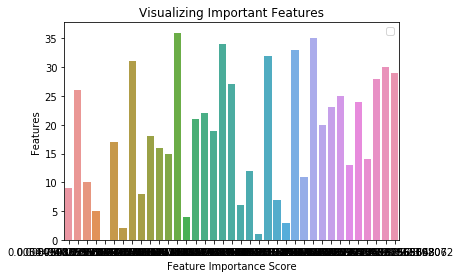

In [2]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=5) # 70% training and 15% test

# ensemble methods used for improving classification model accuracy
# Random forest - ensemble of decision trees to increase accuracy

print("\nEnsemble Accuracy")
rf=RandomForestClassifier(n_estimators=320,n_jobs=-1, 
                          random_state=2,criterion='gini')
rf.fit(X_train,y_train)

#accuracy score
#print("Score: ",rf.score(X_test,y_test))




y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
# print(cm)
print("F1-score: ",rf.score(X_test,y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
print("Precision:",metrics.precision_score(y_test, y_pred)*100)
print("Recall:",metrics.recall_score(y_test, y_pred)*100)





feature_imp = pd.Series(rf.feature_importances_).sort_values(ascending=False)
print('features importances: ',feature_imp)
print('features importances: ',len(feature_imp))

sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)), annot=True, cmap="Greens" ,fmt='g')
# plt.tight_layout()
# plt.title('Confusion matrix', y=1.1)
# plt.ylabel('Actual label')
# plt.xlabel('Predicted label')
# plt.show()

# sns.countplot(y_pred)
# plt.ylabel('Count')
# plt.xlabel('DT(Test data only)')
# plt.show()
